####  Implement Find-S algorithm for finding most specific hypothesis using Python.



The Find-S algorithm is used to find the most specific hypothesis that fits a given set of training examples in the concept learning problem. It starts with the most specific hypothesis and iteratively generalizes it to match all positive examples while excluding negative ones.

In [152]:
# 1a
import pandas as pd  # Import pandas for reading CSV files

# Read the dataset
dataset = pd.read_csv("enjoy_sport.csv", header=None)

# Convert the dataset into a list of lists for easier processing
data = dataset.values.tolist()

# Print the dataset for reference
print("Dataset:")
print(dataset)

# Number of attributes in the dataset (excluding the target column)
num_attributes = len(data[0]) - 1 #6

# Initialize the hypothesis with the most specific values ('0')
hypothesis = ['0'] * num_attributes

print("\nInitial Hypothesis: ", hypothesis)
print("\nFind-S Algorithm Execution")

# Set the first positive example as the initial hypothesis
hypothesis = data[0][:-1]

# Iterate through the dataset
for index, example in enumerate(data):
    # If the target value is 'yes' (positive example)
    if example[num_attributes] == 'yes':
        # Update the hypothesis
        for attribute_index in range(num_attributes):
            if example[attribute_index] != hypothesis[attribute_index]:
                hypothesis[attribute_index] = '?'  # Generalize conflicting attributes
    # Print the hypothesis after processing each example
    print(f"Training Example No {index + 1}, Hypothesis: {hypothesis}")

# Output the final hypothesis
print("\nMaximally Specific Hypothesis: ", hypothesis)


Dataset:
       0     1       2       3     4       5    6
0  sunny  warm  normal  strong  warm    same  yes
1  sunny  warm    high  strong  warm    same  yes
2  rainy  cold    high  strong  warm  change   no
3  sunny  warm    high  strong  cool  change  yes

Initial Hypothesis:  ['0', '0', '0', '0', '0', '0']

Find-S Algorithm Execution
Training Example No 1, Hypothesis: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
Training Example No 2, Hypothesis: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Training Example No 3, Hypothesis: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Training Example No 4, Hypothesis: ['sunny', 'warm', '?', 'strong', '?', '?']

Maximally Specific Hypothesis:  ['sunny', 'warm', '?', 'strong', '?', '?']


#### Implement Linear Regression using Python.

Linear Regression is a supervised machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation. It is used for predicting continuous values.

Feature (x):
 [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]] 

Target (y):
 [[4.11203136]
 [4.57580608]
 [4.28163052]
 [4.10193387]
 [3.89169592]
 [4.32515566]
 [4.02458233]
 [4.76303018]
 [4.95863229]
 [3.68147346]] 

Predicted Value for x=0.5: [[4.03919002]]


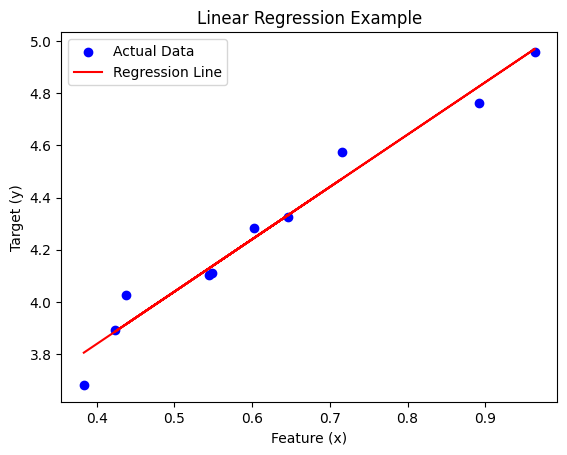

In [153]:
# 1b
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data
x = np.random.rand(10, 1)  # Feature variable
y = 3 + 2*x + np.random.randn(10, 1)/10  # Linear relationship with noise

# Print dataset
print("Feature (x):\n", x, "\n")
print("Target (y):\n", y, "\n")

# Train Linear Regression model
model = LinearRegression()
model.fit(x, y)

# Predict for a new value
x_new = np.array([[0.5]])  # Corrected input format
y_pred = model.predict(x_new)

print("Predicted Value for x=0.5:", y_pred)

# Plot data points
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot regression line
plt.plot(x, model.predict(x), color='red', label="Regression Line")

# Display the plot
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Example")
plt.legend()
plt.show()


#### Implement Candidate Elimination algorithm to output description of set of all hypothesis.


The Candidate Elimination algorithm is used to find a set of hypotheses that are consistent with the given training examples. It gradually eliminates inconsistent hypotheses, refining the hypothesis space, and outputs a general-to-specific set of hypotheses.

In [154]:
# 2a
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('enjoy_sport.csv')

# Extract features (concepts) and labels (target)
features = np.array(data.iloc[:, 0:-1])  # All columns except the last one
labels = np.array(data.iloc[:, -1])      # The last column

def learn(features, labels):
    # Initialize the specific hypothesis with the first instance
    specific_hypothesis = features[0].copy()
    print("Initialization of Specific Hypothesis:")
    print(specific_hypothesis)

    # Initialize the general hypothesis as a set of all "?" (most general form)
    general_hypotheses = [["?" for _ in range(len(specific_hypothesis))] for _ in range(len(specific_hypothesis))]
    print("\nInitialization of General Hypotheses:")
    print(general_hypotheses)

    # Iterate over all examples
    for instance_idx, instance in enumerate(features):
        if labels[instance_idx] == "yes":  # Positive instance
            print(f"\nProcessing Positive Instance {instance_idx + 1}: {instance}")
            for feature_idx in range(len(specific_hypothesis)):
                if instance[feature_idx] != specific_hypothesis[feature_idx]:
                    specific_hypothesis[feature_idx] = '?'
                    general_hypotheses[feature_idx][feature_idx] = '?'

        elif labels[instance_idx] == "no":  # Negative instance
            print(f"\nProcessing Negative Instance {instance_idx + 1}: {instance}")
            for feature_idx in range(len(specific_hypothesis)):
                if instance[feature_idx] != specific_hypothesis[feature_idx]:
                    general_hypotheses[feature_idx][feature_idx] = specific_hypothesis[feature_idx]
                else:
                    general_hypotheses[feature_idx][feature_idx] = '?'

        print("\nUpdated Specific Hypothesis:")
        print(specific_hypothesis)
        print("\nUpdated General Hypotheses:")
        print(general_hypotheses)
        print("\n")

    # Remove redundant general hypotheses
    cleaned_general_hypotheses = [
        hypothesis for hypothesis in general_hypotheses
        if hypothesis != ['?' for _ in range(len(specific_hypothesis))]
    ]

    return specific_hypothesis, cleaned_general_hypotheses

# Run the algorithm
final_specific_hypothesis, final_general_hypotheses = learn(features, labels)

# Output results
print("\nFinal Specific Hypothesis:")
print(final_specific_hypothesis)

print("\nFinal General Hypotheses:")
print(final_general_hypotheses)

Initialization of Specific Hypothesis:
['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Initialization of General Hypotheses:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Processing Positive Instance 1: ['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Updated Specific Hypothesis:
['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Updated General Hypotheses:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Processing Negative Instance 2: ['rainy' 'cold' 'high' 'strong' 'warm' 'change']

Updated Specific Hypothesis:
['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Updated General Hypotheses:
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?'

#### Implement Logistic Regression using Python.

Logistic Regression is a classification algorithm used to predict the probability of a binary outcome (0 or 1). It uses the logistic function to model the relationship between the input variables and the probability of the target class.

In [155]:
# 2b
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (binary cross-entropy)
def compute_cost(y, y_pred):
    m = y.shape[0]
    cost = - (1/m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    return cost

# Gradient Descent
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias

# Prediction
def predict(X, weights, bias):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= 0.5).astype(int)

# Generate data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
weights, bias = train_logistic_regression(X_train, y_train)

# Predict and evaluate
y_pred = predict(X_test, weights, bias)
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7800


#### Illustrate Bias and variance using Python.
 


Bias and variance are two key components that affect the performance of a machine learning model. Bias refers to errors that happen because the model is too simple, while variance refers to error caused by the model's sensitivity to small fluctuations in the training data.

In [156]:
import numpy as np
import pandas as pd
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('heart.csv')

# Check for missing values
data.isnull().sum()

# If there are categorical columns, encode them (for example, if there's a 'sex' column with 'M' and 'F')
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# If there are missing values, drop them or fill with the mean/median
data = data.dropna()  # You can replace this with `data.fillna(data.mean())` if you prefer

# Convert the data to numpy arrays
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Initialize the model
model = LinearRegression()

# Perform bias-variance decomposition
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', 
                                      num_rounds=200, random_seed=1)

# Print results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 0.138
Bias: 0.127
Variance: 0.011


#### Implement Binary classifier using Python.

A binary classifier is a model used to classify data into two categories (0 or 1). Common binary classification algorithms include Logistic Regression, Decision Trees, and Support Vector Machines (SVM).

In [157]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

# Generate synthetic binary classification data
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Convert to DataFrame for better visualization
df = pd.DataFrame(x, columns=[f"Feature_{i}" for i in range(1, 11)])
df["Target"] = y

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Model Accuracy: 0.7700
Mean Squared Error (MSE): 0.2300


#### Illustrate Removing duplicates and cross validation using Python.


Removing duplicates ensures that the dataset does not have repeated entries, which could introduce bias into the model. Cross-validation is a technique used to assess the performance of a model by splitting the dataset into multiple subsets and testing the model on each.

In [158]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Print the original shape of the dataset
print("Original Data Shape: ", iris_df.shape)

# Check for duplicates and print the number of duplicates
print("Number of Duplicates: ", iris_df.duplicated().sum())

# Remove duplicates from the dataset
iris_df = iris_df[~iris_df.duplicated()]

# Now update the target variable `y` to match the number of rows in iris_df
y = iris_data.target[:iris_df.shape[0]]  # Ensure y has the same number of samples

# Check again for duplicates after removal
print("Number of Duplicates After Removal: ", iris_df.duplicated().sum())

# Print the new shape of the dataset after removing duplicates
print("New Data Shape After Removing Duplicates: ", iris_df.shape)

# Step 2: Cross-validation using KFold
X = iris_df.values  # Features

clf = DecisionTreeClassifier(random_state=42)

# KFold Cross-validation with 5 splits
kf = KFold(n_splits=5)
kf_scores = cross_val_score(clf, X, y, cv=kf)
print("\nKFold Cross-validation Scores: ", kf_scores)
print("Average KFold CV Score: {:.4f}".format(kf_scores.mean()))

# Step 3: StratifiedKFold (Ensures proportional class distribution in each fold)
skf = StratifiedKFold(n_splits=5)
skf_scores = cross_val_score(clf, X, y, cv=skf)
print("\nStratifiedKFold Cross-validation Scores: ", skf_scores)
print("Average StratifiedKFold CV Score: {:.4f}".format(skf_scores.mean()))

# Step 4: ShuffleSplit Cross-validation
ss = ShuffleSplit(n_splits=5, test_size=0.3, train_size=0.6, random_state=42)
ss_scores = cross_val_score(clf, X, y, cv=ss)
print("\nShuffleSplit Cross-validation Scores: ", ss_scores)
print("Average ShuffleSplit CV Score: {:.4f}".format(ss_scores.mean()))


Original Data Shape:  (150, 4)
Number of Duplicates:  1
Number of Duplicates After Removal:  0
New Data Shape After Removing Duplicates:  (149, 4)

KFold Cross-validation Scores:  [1.         1.         0.83333333 0.93333333 0.79310345]
Average KFold CV Score: 0.9120

StratifiedKFold Cross-validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average StratifiedKFold CV Score: 0.9533

ShuffleSplit Cross-validation Scores:  [0.95555556 0.97777778 0.93333333 0.91111111 0.95555556]
Average ShuffleSplit CV Score: 0.9467



#### Write a program to implement one hot encoding.


One-hot encoding is a method of representing categorical variables as binary vectors, where each category is represented by a 1 in its respective position and 0 in all other positions. This is used in machine learning to handle categorical features.

In [159]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 

# Input data
data = {'Employee id': [10, 20, 15, 25, 30], 
        'Gender': ['M', 'F', 'F', 'M', 'F'], 
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'], 
       }

# Create DataFrame
df = pd.DataFrame(data) 
print(f'Employee data:\n{df}\n')

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() 

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Corrected to sparse_output=False

# Perform one-hot encoding
one_hot_encoded = encoder.fit_transform(df[categorical_columns]) 

# Create DataFrame for one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)) 

# Concatenate original DataFrame with the encoded columns
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1) 

# Display the result
print(f"Encoded Employee data:\n{df_encoded}")


Employee data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

Encoded Employee data:
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


#### Implement KNN on Iris dataset using Python.


K-Nearest Neighbors (KNN) is a classification algorithm that assigns a class to a data point based on the majority class of its K nearest neighbors in the feature space. It is a non-parametric method that works well for small to medium datasets.

In [160]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()

# Convert it to a DataFrame for better readability
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Show the first few rows of the dataset
print(df.head())

# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN on the Iris dataset: {accuracy * 100:.2f}%")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy of KNN on the Iris dataset: 100.00%


#### Implement Navie Bayes classifier.


Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming independence between the features. It calculates the probability of each class and assigns the class with the highest probability to each input.

In [161]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset (Iris dataset)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create the Naive Bayes model (GaussianNB)
nb_model = GaussianNB()

# Step 5: Train the model on the training data
nb_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.78%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


#### Implement K-Means algorithm using Python.


K-Means is a clustering algorithm that partitions a dataset into K distinct clusters based on feature similarity. It assigns each point to the nearest centroid, and iteratively adjusts centroids until convergence.

           0         1
0  -9.297689  6.473679
1  -9.698741  6.938967
2  -1.686653  7.793442
3  -7.097308 -5.781333
4 -10.876452  6.315437
Training Silhouette Score: 0.66
Testing Silhouette Score: 0.64


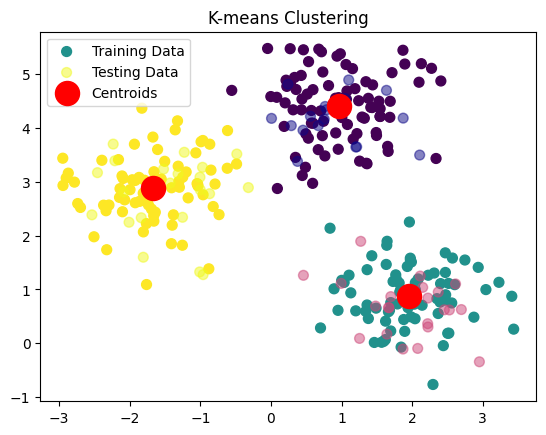

In [162]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic dataset
data, labels = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

# Convert the data into a Pandas DataFrame for easier viewing
df = pd.DataFrame(data)
print(df.head())  # View the first 5 rows

# Create a dataset with 3 clusters (for k-means)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Split Dataset into Training and Testing Sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 3: Fit the Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Step 4: Predict using the trained model
y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

# Step 5: Evaluate using silhouette score
train_silhouette = silhouette_score(X_train, y_train_pred)
test_silhouette = silhouette_score(X_test, y_test_pred)

# Print silhouette scores
print(f"Training Silhouette Score: {train_silhouette:.2f}")
print(f"Testing Silhouette Score: {test_silhouette:.2f}")

# Step 6: Plot the clusters
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, s=50, cmap='viridis', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, s=50, cmap='plasma', label='Testing Data', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()


####  Illustrate Exploratory data analysis using matplotlib.


Exploratory Data Analysis (EDA) involves summarizing the main characteristics of a dataset through visualizations and statistical methods. Matplotlib is commonly used to create plots like histograms, scatter plots, and boxplots for this purpose.

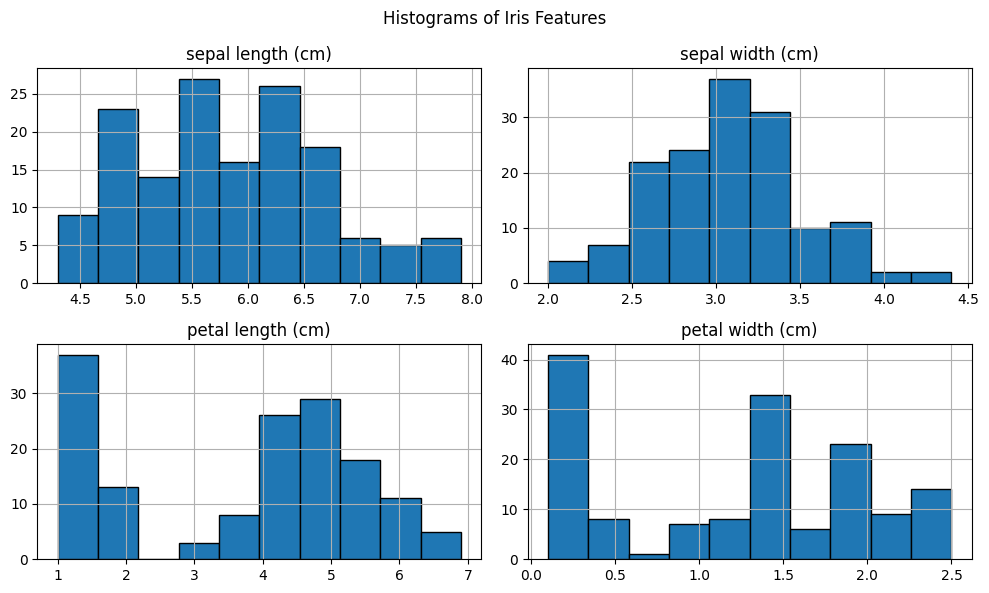

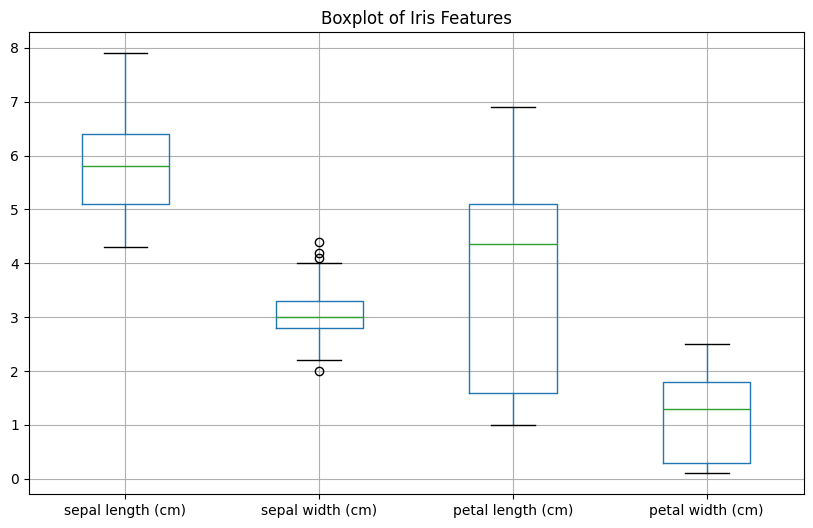

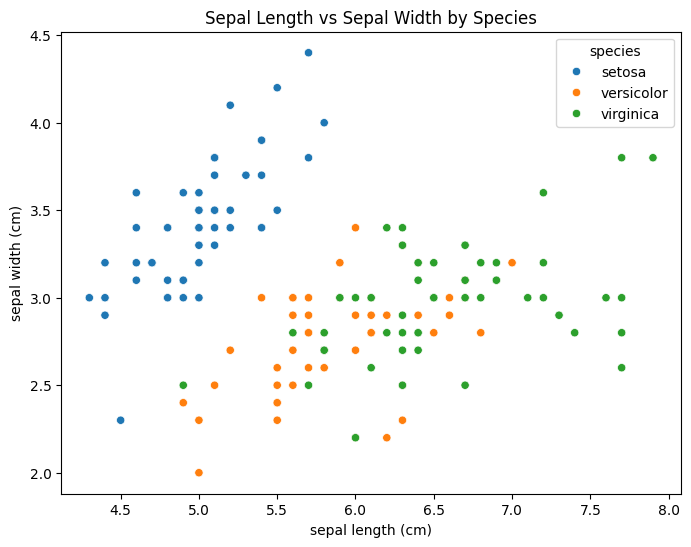

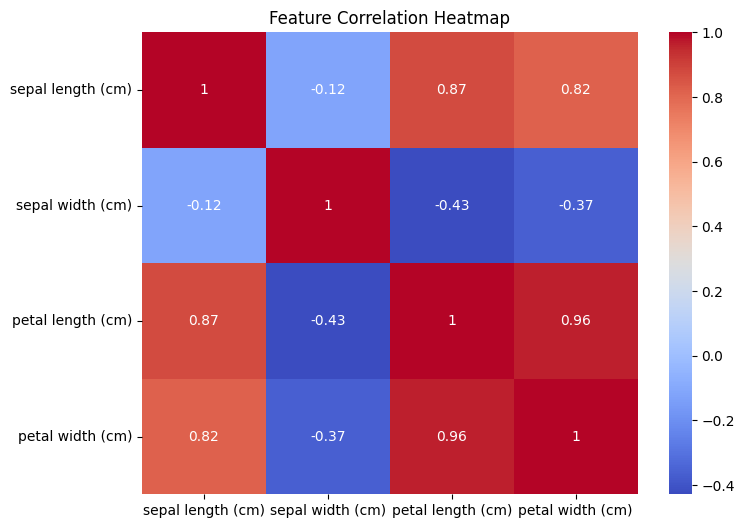

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. Histogram for each feature
df.hist(edgecolor='black', figsize=(10, 6))
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

# 2. Boxplot for features
df.drop(columns='species').boxplot(figsize=(10, 6))
plt.title("Boxplot of Iris Features")
plt.show()

# 3. Scatter plot: Sepal Length vs Sepal Width by Species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


#### Implement SVM using Python.


Support Vector Machines (SVM) are supervised learning algorithms that are used for classification and regression. SVMs work by finding the hyperplane that best separates different classes in the feature space.

In [164]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Step 3: Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Step 7: Display results
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


####  Implement PCA using Python.


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a set of orthogonal components, maximizing the variance captured by the new features. It is often used for feature reduction and visualization.

In [165]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA

# Sample dataset
X = np.array([
    [-1, 1],
    [-2, -1],
    [-3, -2],
    [1, 1],
    [2, 1],
    [3, 2]
])

# ---------- PCA ----------
print("Standard PCA:")
pca = PCA(n_components=2)
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Singular Values:", pca.singular_values_)
print()

# ---------- Randomized PCA ----------
print("Randomized PCA:")
random_pca = PCA(n_components=2, svd_solver='randomized')
random_pca.fit(X)
print("Explained Variance Ratio:", random_pca.explained_variance_ratio_)
print("Singular Values:", random_pca.singular_values_)
print()

# ---------- Kernel PCA ----------
print("Kernel PCA (RBF):")
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
print("Transformed Data:\n", X_reduced)


Standard PCA:
Explained Variance Ratio: [0.95864607 0.04135393]
Singular Values: [6.14058185 1.27537752]

Randomized PCA:
Explained Variance Ratio: [0.95864607 0.04135393]
Singular Values: [6.14058185 1.27537752]

Kernel PCA (RBF):
Transformed Data:
 [[ 0.12411036  0.38810034]
 [ 0.55966267  0.03207624]
 [ 0.70836481 -0.27961945]
 [-0.31324401  0.17720771]
 [-0.47688755 -0.03064082]
 [-0.60200629 -0.28712402]]
